## Modelo preditivo

**Objetivos:**

Criar um modelo para prever resultados dos processos em três classes: **vitória, derrota e acordo.**

**Algorítmos:**

- RandomForestClassifier
- DecisionTreeClassifier

**Features:**

['UF Comarca', 'Comarca', 'Vara', 'Número Vara', 'Empresa Origem',  
'Tipo Cadastro', 'Tipo Pedido', 'Categoria Veículo', 'Natureza Sinistro', 
'Mérito', 'Advogado Adverso', 'Decisão Pedido']


### Importanto bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, OrdinalEncoder
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")
#from IPython.display import display, HTML

### Carregando e conhecendo os dados

In [2]:
df = pd.read_excel(
        open(r"C:\Users\Usuario\Desktop\Arquivos RMS\Seguradora Líder\MachineLearning\BASE ATIVA.xlsx", 'rb'),
        sheet_name='Sheet1', engine='openpyxl')

df.head()

,Escritório,Pasta,Data Cadastro Pasta,Status Pasta,Data Status Alterado,UF Comarca,Comarca,Foro,Vara,Número Vara,...,Valor Atualizado,Data Validação Sinistro,CPF Vítima,Data Nascimento Vítima,Status Pedido,Especificação,Decisão Pedido,Identificador Pedido,Advogado Adverso,Adv Adverso Restrito?
0,Rocha Marinho E Sales Sociedade De Advogados,43253,2007-07-24,Encerrada,2020-11-11,CE,Boa Viagem,Não aplicado,Vara Cível,Única,...,0.00,2020-05-28,3.201256e+10,1968-01-08,Validado,Êxito no Mérito,Ganho de Causa,1268258.0,Jeferson Cavalcante De Lucena,Não
1,Rocha Marinho E Sales Sociedade De Advogados,149767,2018-11-29,Encerrada,2020-12-23,PE,Recife,Não aplicado,Vara Cível,20,...,29855.05,2020-11-12,4.600508e+10,1966-03-17,Validado,--,Perda de Causa,1400104.0,Jose Orisvaldo Brito Da Silva,Sim
2,Rocha Marinho E Sales Sociedade De Advogados,338856,2008-08-09,Ativa,2020-03-31,CE,Tauá,Não aplicado,Juizado Especial Cível,Única,...,22452.91,2020-04-06,2.828144e+08,1949-06-14,Validado,--,Perda de Causa,1230843.0,Winston Glayton Alves Lima,Não
3,Rocha Marinho E Sales Sociedade De Advogados,389206,2008-12-12,Encerrada,2020-06-25,PE,Abreu E Lima,Não aplicado,Vara Cível,2,...,0.06,2020-03-06,NaN,1931-05-02,Validado,--,Perda de Causa,1203594.0,Jose Orisvaldo Brito Da Silva,Não
4,Rocha Marinho E Sales Sociedade De Advogados,389266,2008-12-12,Encerrada,2020-09-30,PE,Alagoinha,Não aplicado,Vara Cível,Única,...,24596.19,2020-01-08,NaN,1939-12-27,Validado,--,Perda de Causa,1153868.0,Jose Orisvaldo Brito Da Silva,Não


In [3]:
df.columns

Index(['Escritório', 'Pasta', 'Data Cadastro Pasta', 'Status Pasta',
       'Data Status Alterado', 'UF Comarca', 'Comarca', 'Foro', 'Vara',
       'Número Vara', 'Data Distribuição', 'Data Recebimento Seguradora Líder',
       'Data Recebimento Seguradora Demandada', 'Data Audiência', 'Data Prazo',
       'Data Primeira Rejeição', 'Empresa Origem', 'Tipo Cadastro', 'Processo',
       'Tipo Andamento', 'Data Publicação', 'Data Cadastro Andamento',
       'Sinistro', 'Indicador Pedido Válido', 'Tipo Pedido',
       'Data Fase Processual', 'Fase Processual', 'Prognóstico',
       'Status Sinistro', 'Categoria Veículo', 'Tipo Sinistro',
       'Natureza Sinistro', 'Data Sinistro', 'Data Aprovação Sinistro',
       'Data Criação Sinistro', 'Indicador Sinistro Aprovado', 'Mérito',
       'Natureza Movimento', 'Vítima', 'Valor Atualizado',
       'Data Validação Sinistro', 'CPF Vítima', 'Data Nascimento Vítima',
       'Status Pedido', 'Especificação', 'Decisão Pedido',
       'Identificador

In [4]:
# Observa-se que os valores da coluna "Pasta" possuem duplicidade

any(df['Pasta'].duplicated())

True

In [5]:
total = df.shape[0]
df = df.drop_duplicates(subset='Pasta', keep='first')

print(total - df.shape[0], ' linhas duplicadas removidas.')

4075  linhas duplicadas removidas.


In [6]:
# Verificando classificação no Status da Pasta

df['Status Pasta'].value_counts()

Encerrada    24164
Ativa         9922
Name: Status Pasta, dtype: int64

In [7]:
# Filtrado apenas casos Encerrados

df1 = df[df['Status Pasta']=='Encerrada']
df1.shape

(24164, 49)

In [8]:
# Verificando as classificações das Decisões

df1['Decisão Pedido'].value_counts()

Ganho de Causa    15779
Perda de Causa     5257
Acordo             3120
Name: Decisão Pedido, dtype: int64

### Escolhendo e preparando as features

In [9]:
# Escolhendo features para o modelo

# 'Valor Atualizado'

#features = ['UF Comarca', 'Comarca', 'Vara', 'Número Vara', 'Empresa Origem',  'Tipo Cadastro', 
#          'Tipo Pedido', 'Categoria Veículo', 'Natureza Sinistro', 'Mérito',
#          'Advogado Adverso', 'Decisão Pedido']

#features = ['UF Comarca', 'Comarca', 'Vara', 'Empresa Origem', 
#             'Tipo Pedido', 'Categoria Veículo', 'Natureza Sinistro',
#              'Decisão Pedido']


features = ['Mérito', 'Tipo Pedido', 'Categoria Veículo', 'Natureza Sinistro', 'Decisão Pedido']

In [10]:
# Criando DataFrame com features

df_features = df1[features]
df_features.head()

,Mérito,Tipo Pedido,Categoria Veículo,Natureza Sinistro,Decisão Pedido
0,Aplicação Da Tabela - Discordância Com A Aplic...,Diferença de Invalidez,"009 – Ciclomotor, motoneta, motocicleta e tric...",Invalidez,Ganho de Causa
1,Indenização - Falha Na Divisão Entre Herdeiros,Diferença de Morte,099 – Veículo não identificado antes,Morte,Perda de Causa
3,Correção Monetária - Mp 340,Morte,099 – Veículo não identificado antes,Morte,Perda de Causa
4,Indenização - Baseada Em Sm,Diferença de Morte,"001 – Automóvel / Camioneta – Particular, oficial",Morte,Perda de Causa
5,Indenização - Sem Sinistro Administrativo Prévio,Morte,003 – Micro-ônibus / Ônibus – Aluguel,Morte,Acordo


In [11]:
# Verificando as classificações das features

#print('* Decisão Pedido \n\n', df_features['Decisão Pedido'].value_counts(), '\n', '-'*60)
#print('* Comarca \n\n', df_features['Comarca'].value_counts(), '\n', '-'*60)
#print('* Vara \n\n', df_features['Vara'].value_counts(), '\n', '-'*60)
#print('* Número Vara \n\n', df_features['Número Vara'].value_counts(), '\n', '-'*60)
#print('* Tipo Cadastro \n\n', df_features['Tipo Cadastro'].value_counts(), '\n', '-'*60)
#print('* Tipo Pedido \n\n', df_features['Tipo Pedido'].value_counts(), '\n', '-'*60)
#print('* Categoria Veículo \n\n', df_features['Categoria Veículo'].value_counts(), '\n', '-'*60)
#print('* Mérito \n\n', df_features['Mérito'].value_counts(), '\n', '-'*60)
#print('* Valor Atualizado \n\n', df_features['Valor Atualizado'].value_counts(), '\n', '-'*60)
#print('* Advogado Adverso \n\n', df_features['Advogado Adverso'].value_counts(), '\n', '-'*60)

In [12]:
# Verificando valores nulos

df_features.isnull().sum()

Mérito               87
Tipo Pedido           8
Categoria Veículo     8
Natureza Sinistro     8
Decisão Pedido        8
dtype: int64

In [13]:
df_features = df_features.dropna(how='any',axis=0)
df_features.isnull().sum()

Mérito               0
Tipo Pedido          0
Categoria Veículo    0
Natureza Sinistro    0
Decisão Pedido       0
dtype: int64

In [14]:
df_features.shape

(24077, 5)

### Categorizando em números

In [15]:
feature_list = []

for i in features:
    feature_list.append(list(df_features[i]))

feature_list

[['Aplicação Da Tabela - Discordância Com A Aplicação',
  'Indenização - Falha Na Divisão Entre Herdeiros',
  'Correção Monetária - Mp 340',
  'Indenização - Baseada Em Sm',
  'Indenização - Sem Sinistro Administrativo Prévio',
  'Aplicação Da Tabela - Discordância Com A Aplicação',
  'Indenização - Sem Sinistro Administrativo Prévio',
  'Aplicação Da Tabela - Discordância Com A Aplicação',
  'Aplicação Da Tabela - Discordância Com A Aplicação',
  'Aplicação Da Tabela - Discordância Com A Aplicação',
  'Indenização - Sem Sinistro Administrativo Prévio',
  'Aplicação Da Tabela - Discordância Com A Aplicação',
  'Aplicação Da Tabela - Discordância Com A Aplicação',
  'Aplicação Da Tabela - Discordância Com A Aplicação',
  'Aplicação Da Tabela - Discordância Com A Aplicação',
  'Aplicação Da Tabela - Discordância Com A Aplicação',
  'Aplicação Da Tabela - Discordância Com A Aplicação',
  'Aplicação Da Tabela - Discordância Com A Aplicação',
  'Aplicação Da Tabela - Discordância Com A Apli

In [16]:
ordi = OrdinalEncoder(categories=feature_list)

In [17]:
ordi.fit(df_features[features])

OrdinalEncoder(categories=[['Aplicação Da Tabela - Discordância Com A '
                            'Aplicação',
                            'Indenização - Falha Na Divisão Entre Herdeiros',
                            'Correção Monetária - Mp 340',
                            'Indenização - Baseada Em Sm',
                            'Indenização - Sem Sinistro Administrativo Prévio',
                            'Aplicação Da Tabela - Discordância Com A '
                            'Aplicação',
                            'Indenização - Sem Sinistro Administrativo Prévio',
                            'Aplicação Da Tabela - Discordância Com A '
                            'Ap...
                            'Perda de Causa', 'Perda de Causa', 'Acordo',
                            'Ganho de Causa', 'Ganho de Causa',
                            'Ganho de Causa', 'Ganho de Causa', 'Acordo',
                            'Perda de Causa', 'Acordo', 'Ganho de Causa',
                         

In [18]:
pd.DataFrame(ordi.transform(df_features[features]), columns=[features])

,Mérito,Tipo Pedido,Categoria Veículo,Natureza Sinistro,Decisão Pedido
0,24076.0,24076.0,24076.0,24076.0,24076.0
1,24002.0,24002.0,23696.0,24024.0,24073.0
2,23903.0,24024.0,23696.0,24024.0,24073.0
3,401.0,24002.0,24059.0,24024.0,24073.0
4,24052.0,24024.0,23841.0,24024.0,15455.0
...,...,...,...,...,...
24072,24076.0,24076.0,24076.0,24076.0,24076.0
24073,24073.0,24073.0,24076.0,24076.0,24073.0
24074,24076.0,24076.0,24076.0,24076.0,24076.0
24075,24076.0,24076.0,24076.0,24076.0,24076.0


In [19]:
new_feature = df_features.iloc[:5, :]
test = pd.DataFrame(ordi.transform(new_feature), columns=[features])
test

,Mérito,Tipo Pedido,Categoria Veículo,Natureza Sinistro,Decisão Pedido
0,24076.0,24076.0,24076.0,24076.0,24076.0
1,24002.0,24002.0,23696.0,24024.0,24073.0
2,23903.0,24024.0,23696.0,24024.0,24073.0
3,401.0,24002.0,24059.0,24024.0,24073.0
4,24052.0,24024.0,23841.0,24024.0,15455.0


In [20]:
# Resultado esperado na decodificação

new_feature

,Mérito,Tipo Pedido,Categoria Veículo,Natureza Sinistro,Decisão Pedido
0,Aplicação Da Tabela - Discordância Com A Aplic...,Diferença de Invalidez,"009 – Ciclomotor, motoneta, motocicleta e tric...",Invalidez,Ganho de Causa
1,Indenização - Falha Na Divisão Entre Herdeiros,Diferença de Morte,099 – Veículo não identificado antes,Morte,Perda de Causa
3,Correção Monetária - Mp 340,Morte,099 – Veículo não identificado antes,Morte,Perda de Causa
4,Indenização - Baseada Em Sm,Diferença de Morte,"001 – Automóvel / Camioneta – Particular, oficial",Morte,Perda de Causa
5,Indenização - Sem Sinistro Administrativo Prévio,Morte,003 – Micro-ônibus / Ônibus – Aluguel,Morte,Acordo


In [21]:
# Decodificando

pd.DataFrame(ordi.inverse_transform(test), columns=features)

,Mérito,Tipo Pedido,Categoria Veículo,Natureza Sinistro,Decisão Pedido
0,Aplicação Da Tabela - Discordância Com A Aplic...,Diferença de Invalidez,"009 – Ciclomotor, motoneta, motocicleta e tric...",Invalidez,Ganho de Causa
1,Indenização - Falha Na Divisão Entre Herdeiros,Diferença de Morte,099 – Veículo não identificado antes,Morte,Perda de Causa
2,Correção Monetária - Mp 340,Morte,099 – Veículo não identificado antes,Morte,Perda de Causa
3,Indenização - Baseada Em Sm,Diferença de Morte,"001 – Automóvel / Camioneta – Particular, oficial",Morte,Perda de Causa
4,Indenização - Sem Sinistro Administrativo Prévio,Morte,003 – Micro-ônibus / Ônibus – Aluguel,Morte,Acordo


In [22]:
# Todos os Estados

# Separa os dados que serão transformado num array
categorias = df_features.copy().values
categorias

array([['Aplicação Da Tabela - Discordância Com A Aplicação',
        'Diferença de Invalidez',
        '009 – Ciclomotor, motoneta, motocicleta e triciclo',
        'Invalidez', 'Ganho de Causa'],
       ['Indenização - Falha Na Divisão Entre Herdeiros',
        'Diferença de Morte', '099 – Veículo não identificado antes',
        'Morte', 'Perda de Causa'],
       ['Correção Monetária - Mp 340', 'Morte',
        '099 – Veículo não identificado antes', 'Morte',
        'Perda de Causa'],
       ...,
       ['Aplicação Da Tabela - Discordância Com A Aplicação',
        'Diferença de Invalidez',
        '009 – Ciclomotor, motoneta, motocicleta e triciclo',
        'Invalidez', 'Ganho de Causa'],
       ['Aplicação Da Tabela - Discordância Com A Aplicação',
        'Diferença de Invalidez',
        '009 – Ciclomotor, motoneta, motocicleta e triciclo',
        'Invalidez', 'Ganho de Causa'],
       ['Aplicação Da Tabela - Discordância Com A Aplicação',
        'Diferença de Invalidez',
  

In [23]:
# Instancia o LabelEncoder()
labelEncoder_ = LabelEncoder()

# Transformando strings categóricas
for i in range(len(categorias[0])):
  categorias[:,i] = labelEncoder_.fit_transform(categorias[:,i])
categorias

array([[0, 5, 6, 1, 1],
       [21, 6, 8, 2, 2],
       [5, 9, 8, 2, 2],
       ...,
       [0, 5, 6, 1, 1],
       [0, 5, 6, 1, 1],
       [0, 5, 6, 1, 1]], dtype=object)

In [24]:
colunas = df_features.columns

df_categorico = pd.DataFrame(categorias, columns=colunas)
df_categorico

,Mérito,Tipo Pedido,Categoria Veículo,Natureza Sinistro,Decisão Pedido
0,0,5,6,1,1
1,21,6,8,2,2
2,5,9,8,2,2
3,11,6,1,2,2
4,22,9,3,2,0
...,...,...,...,...,...
24072,0,5,6,1,1
24073,13,7,6,1,2
24074,0,5,6,1,1
24075,0,5,6,1,1


In [25]:
df_categorico.dtypes

Mérito               object
Tipo Pedido          object
Categoria Veículo    object
Natureza Sinistro    object
Decisão Pedido       object
dtype: object

In [26]:
df_categorico = df_categorico.astype(int)
df_categorico.dtypes

Mérito               int32
Tipo Pedido          int32
Categoria Veículo    int32
Natureza Sinistro    int32
Decisão Pedido       int32
dtype: object

In [27]:
# Criando DataFrame normalizado

colunas = df_features.columns

scaler = MinMaxScaler(feature_range = (0,10))
scaled_data = scaler.fit_transform(df_categorico)

df_categ_norm = pd.DataFrame(scaled_data, columns=colunas)
df_categ_norm

,Mérito,Tipo Pedido,Categoria Veículo,Natureza Sinistro,Decisão Pedido
0,0.0,4.166667,7.50,5.0,5.0
1,8.4,5.000000,10.00,10.0,10.0
2,2.0,7.500000,10.00,10.0,10.0
3,4.4,5.000000,1.25,10.0,10.0
4,8.8,7.500000,3.75,10.0,0.0
...,...,...,...,...,...
24072,0.0,4.166667,7.50,5.0,5.0
24073,5.2,5.833333,7.50,5.0,10.0
24074,0.0,4.166667,7.50,5.0,5.0
24075,0.0,4.166667,7.50,5.0,5.0


In [28]:
# Reduzindo dimensionalidade

pca=PCA(n_components=2)
pca.fit(df_categ_norm.values)
X_pca = pca.transform(df_categ_norm.values)
df_reduzido = pd.DataFrame(X_pca, columns=['x1', 'x2'])
df_reduzido

,x1,x2
0,-1.415296,-0.858178
1,8.002016,2.035335
2,4.220019,-2.088282
3,5.610492,-0.899746
4,1.501470,9.481534
...,...,...
24072,-1.415296,-0.858178
24073,5.948788,-0.244336
24074,-1.415296,-0.858178
24075,-1.415296,-0.858178


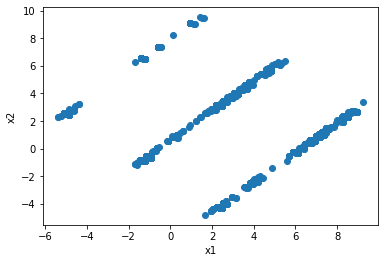

In [29]:
# Visualiznado os dados

plt.scatter(df_reduzido['x1'], df_reduzido['x2'])
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

### Preparando o modelo

In [30]:
# Separadnao a base de dados

#features = ['UF Comarca', 'Comarca', 'Vara', 'Número Vara', 'Empresa Origem',  'Tipo Cadastro', 
#          'Tipo Pedido', 'Categoria Veículo', 'Natureza Sinistro', 'Mérito',
#          'Advogado Adverso', 'Decisão Pedido']

#features = ['UF Comarca', 'Comarca', 'Vara', 'Empresa Origem', 
#             'Tipo Pedido', 'Categoria Veículo', 'Natureza Sinistro']

features = ['Mérito', 'Tipo Pedido']

X = df_categorico[features] # Features
y = df_categorico['Decisão Pedido'] # Variável alvo

In [31]:
# Preparando a base de Treino e Teste

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=1) # 70% treino e 30% teste

Resultados: 1 - Ganho, 2 - Perda e 0 - Acordo

##### Decision Tree

In [32]:
%%time
# Criando classificador de objetos
clf = DecisionTreeClassifier()

# Treinando o classificador
clf = clf.fit(X_train,y_train)

# Prevendo as Decisões
y_pred = clf.predict(X_test)

Wall time: 82 ms


In [33]:
# Model Accuracy, how often is the classifier correct?

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.66114629841138


In [34]:
novo_processo = [1,2]
clf.predict([novo_processo])

array([1])

In [35]:
novo_processo = [1,1]
clf.predict([novo_processo])

array([1])

In [36]:
novo_processo = [13,13]
clf.predict([novo_processo])

array([1])

In [37]:
from sklearn import tree

Wall time: 171 ms


[Text(134.01964285714286, 206.56799999999998, 'X[0] <= 0.5\ngini = 0.512\nsamples = 4815\nvalue = [634, 3132, 1049]'),
 Text(31.885714285714286, 184.824, 'X[1] <= 6.5\ngini = 0.476\nsamples = 3597\nvalue = [585, 2482, 530]'),
 Text(15.942857142857143, 163.07999999999998, 'X[1] <= 4.5\ngini = 0.479\nsamples = 3506\nvalue = [576, 2407, 523]'),
 Text(7.9714285714285715, 141.336, 'gini = 0.625\nsamples = 4\nvalue = [2, 1, 1]'),
 Text(23.914285714285715, 141.336, 'X[1] <= 5.5\ngini = 0.479\nsamples = 3502\nvalue = [574, 2406, 522]'),
 Text(15.942857142857143, 119.592, 'gini = 0.479\nsamples = 3500\nvalue = [574, 2405, 521]'),
 Text(31.885714285714286, 119.592, 'gini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(47.82857142857143, 163.07999999999998, 'X[1] <= 8.0\ngini = 0.305\nsamples = 91\nvalue = [9, 75, 7]'),
 Text(39.85714285714286, 141.336, 'gini = 0.294\nsamples = 89\nvalue = [9, 74, 6]'),
 Text(55.8, 141.336, 'X[1] <= 9.5\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(47.82857

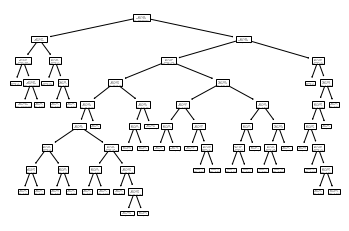

In [38]:
%%time
tree.plot_tree(clf)

##### Random Forest

In [39]:
%%time
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=3)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

Wall time: 16 ms


In [40]:
# Model Accuracy, how often is the classifier correct?

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6601079846329561


In [41]:
novo_processo = [1,2,1,2,1,3,1]
clf.predict([novo_processo])

ValueError: Number of features of the model must match the input. Model n_features is 2 and input n_features is 7 

In [ ]:
novo_processo = [1,1,1,1,1,1,1]
clf.predict([novo_processo])

In [ ]:
novo_processo = [13,13,13,13,13,13,13]
clf.predict([novo_processo])

In [ ]:
plt.figure(figsize=(16,10))
correlacao = df_categorico.corr()
sns.heatmap(correlacao, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
correlacoes = []
df_correlacao = df_categorico[['UF Comarca', 'Comarca', 'Vara', 'Número Vara', 'Empresa Origem',
       'Tipo Cadastro', 'Tipo Pedido', 'Categoria Veículo',
       'Natureza Sinistro', 'Mérito', 'Advogado Adverso', 'Decisão Pedido']]
for i in df_correlacao.columns:
    correlacoes.append((df_correlacao['Decisão Pedido'].corr(df_correlacao[i]), i))

correlacoes.sort(reverse=True)
correlacoes

In [ ]:
df_categorico.columns

In [ ]:
df_correlacao

In [ ]:
list(clf.predict_proba(X_test))